In [15]:
#this is the library used to graph
import matplotlib.pyplot as plt
#this library is the dataframe library, we use this to organize and manipulate data
import pandas as pd
#math and number functions
import numpy as np
import math 
#libraries from tutorial
import seaborn as sns #used with matplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC #support vector classifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
#from sklearn.linear_model import SGDClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
%matplotlib inline 
#only needed when using jupyter notebook
import tensorflow as tf
from tensorflow import keras

In [16]:
msft = pd.read_excel('MSFT_with_technical_data.xlsx')

In [37]:
msft_wo_1 = msft.drop('Unnamed: 27',axis=1)
msft_wo_2 = msft_wo_1.drop('Unnamed: 28', axis=1)
msft_wo_3 = msft_wo_2.drop('Unnamed: 29', axis=1)
msft_wo_4 = msft_wo_3.drop('Unnamed: 30', axis=1)
msft_wo_4 = msft_wo_4.drop('Names Date', axis=1)
msft_wo_4 = msft_wo_4.drop(0)


In [38]:
imp = SimpleImputer(strategy='mean')

In [39]:
X = msft_wo_4
y = msft_wo_4['Closing Price']

In [40]:
imp.fit(X)
X = imp.transform(X)

In [41]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full, random_state = 42)

In [42]:
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_valid = sc.transform(X_test)
X_test = sc.transform(X_test)

In [43]:
X_train = pd.DataFrame(X_train)
X_valid = pd.DataFrame(X_valid)
X_test = pd.DataFrame(X_test)
X_train.shape[1:]

(26,)

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(15, activation='sigmoid', input_shape=X_train.shape[1:]),
    keras.layers.Dense(15,activation='sigmoid'),
    keras.layers.Dense(1)
])

In [61]:
model.compile(loss="mean_absolute_error", optimizer="sgd")

In [62]:
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_valid,y_valid))

Train on 5112 samples, validate on 1704 samples
Epoch 1/100
5112/5112 [==============================] - 0s 31us/sample - loss: 57.7922 - val_loss: 51.1403
Epoch 2/100
5112/5112 [==============================] - 0s 19us/sample - loss: 42.4981 - val_loss: 34.9480
Epoch 3/100
5112/5112 [==============================] - 0s 19us/sample - loss: 31.6692 - val_loss: 32.2426
Epoch 4/100
5112/5112 [==============================] - 0s 19us/sample - loss: 25.8541 - val_loss: 30.6433
Epoch 5/100
5112/5112 [==============================] - 0s 20us/sample - loss: 20.7134 - val_loss: 30.6257
Epoch 6/100
5112/5112 [==============================] - 0s 19us/sample - loss: 16.5932 - val_loss: 31.5885
Epoch 7/100
5112/5112 [==============================] - 0s 20us/sample - loss: 13.8161 - val_loss: 32.5268
Epoch 8/100
5112/5112 [==============================] - 0s 19us/sample - loss: 12.1296 - val_loss: 33.1228
Epoch 9/100
5112/5112 [==============================] - 0s 19us/sample - loss: 10.8399 

Epoch 75/100
5112/5112 [==============================] - 0s 18us/sample - loss: 0.8902 - val_loss: 38.8312
Epoch 76/100
5112/5112 [==============================] - 0s 19us/sample - loss: 0.9013 - val_loss: 38.8980
Epoch 77/100
5112/5112 [==============================] - 0s 19us/sample - loss: 0.9040 - val_loss: 38.7058
Epoch 78/100
5112/5112 [==============================] - 0s 18us/sample - loss: 0.9173 - val_loss: 38.8086
Epoch 79/100
5112/5112 [==============================] - 0s 19us/sample - loss: 0.8957 - val_loss: 38.6443
Epoch 80/100
5112/5112 [==============================] - 0s 19us/sample - loss: 0.8913 - val_loss: 38.9456
Epoch 81/100
5112/5112 [==============================] - 0s 19us/sample - loss: 0.8811 - val_loss: 38.8239
Epoch 82/100
5112/5112 [==============================] - 0s 19us/sample - loss: 0.8773 - val_loss: 38.1506
Epoch 83/100
5112/5112 [==============================] - 0s 18us/sample - loss: 0.8620 - val_loss: 38.3359
Epoch 84/100
5112/5112 [====

In [63]:
mse_test = model.evaluate(X_test,y_test)

1704/1704 [==============================] - 0s 10us/sample - loss: 1.3525


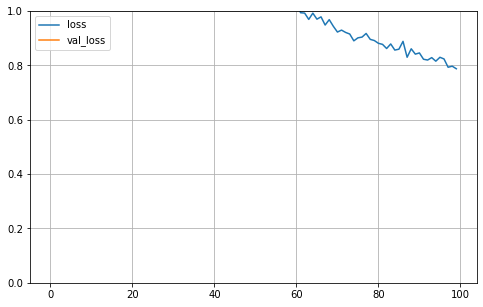

In [64]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()